## Problem Statement
This Project will help credit card companies by Identifing fraudulent credit card transaction to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The company needs to correctly classify the fraud and Non-fraud transactions.The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
# Data Pre-processing Libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,precision_recall_curve,auc,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#
from collections import Counter


### Import Dataset

In [2]:
credit_data = pd.read_csv('creditcard.csv',header="infer",sep=",")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_data.shape

(284807, 31)

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we are not provided with the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Exploratory Data Analysis

#### Data Check

In [4]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


> - Time lapse between 0.0 sec to 172792.0 sec i.e. if we divide the total time given in secs as 172792.0 sec to hours 172792/(60*60) = 47.9 hours i.e. 48 hours as given in the Dataset.
> - V1 till V28 are all PCA applied features also known as Principal components and surely their value must have been scaled. Also, as we donot have domain knowledge in the credit card data. PCA is good for us here.
> - Time,Amount and Class columns are not Principal Components.Time and Amount needs to be scaled.
> - Class is the target column we have.

#### Datatype check

In [6]:
credit_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All columns except for the target column Class are floats.

#### Descriptive Statistics

In [7]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we are just interested in the Amount column that has data between 0-25691 and 75% to 100% has more variation in data.Also the mean > median but we are not commenting anything on amount as of now as it depends on customer's choice.

#### Duplicate Check

In [8]:
credit_data.duplicated().any()

True

In [9]:
credit_data[credit_data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Here we see even though the duplicated() returns True but we cannot say we have duplicate data as when we look into the columns we dont find any values duplicate other than the time column. The time columns are expected to be duplicated.

#### Missing Value Check

In [10]:
credit_data.isnull().sum()  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

None of the columns have Missing values as shown here, this is expected as a credit card transaction is generated only when the credit card is used in real time so no missing value.

#### Data Analysis

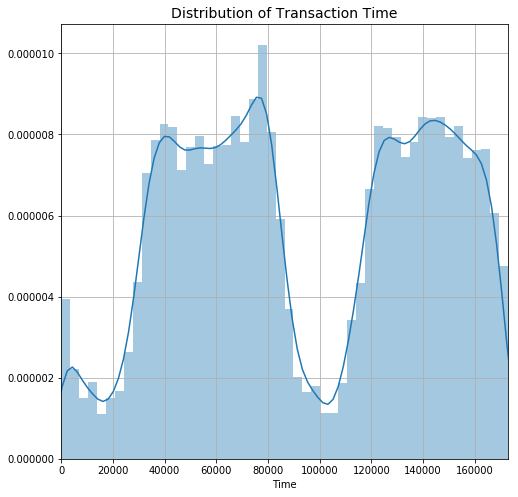

In [11]:
#fig, (ax1,ax2) = plt.subplots(ncols=2)
#fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,6))
plt.figure(figsize=(8,8))

plt.grid()
plt.xlim(credit_data['Time'].min(),credit_data['Time'].max())
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(credit_data['Time'])

#plt.show()

There are various ups and downs in the data implies that the cards are being used more in certain hours of the day and less for certain hours of the day.

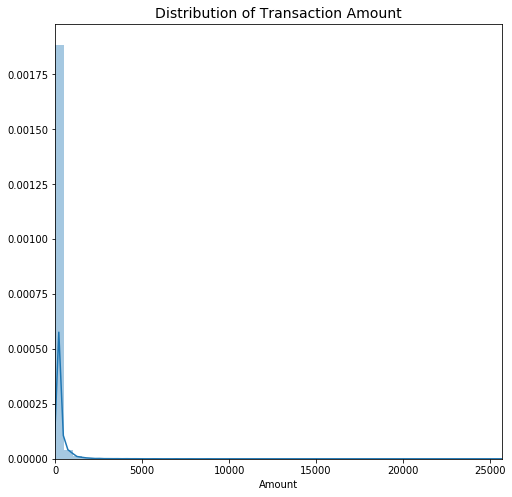

In [12]:
plt.figure(figsize=(8,8))
plt.xlim(min(credit_data['Amount']),max(credit_data['Amount']))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(credit_data['Amount'],hist=True,kde=True)


The amounts though have a large span between 0 to 25K but the majority of amount data lies within 0 to lower 1000.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

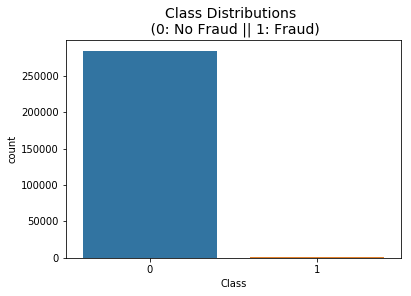

In [13]:
sns.countplot(credit_data['Class'])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [14]:
# counter = Counter(credit_data['Class'])
# for label, _ in counter.items():
#     row_ix = (credit_data['Class']==label)
#     plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# plt.legend()
# plt.show()

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [15]:
credit_data['Class'].value_counts()[1]

492

In [16]:
Fraud_percent = (credit_data['Class'].value_counts()[1]/len(credit_data)*100)
print(Fraud_percent)

0.1727485630620034


Thus, there are just 492 reported Frauds out of 284807 that stands out as just 0.17% of the entire data. This data is highly imbalanced and this needs to be fixed first.

#### Data Scaling
> - Here we will use robust Scaler as the data has more outliers in Amount and this method of scaling is prone to outliers.
> - It assigns all the values within a range like min & max but the range lies between InterQuartile Range [25 percentile - 75 percentile] of the given data for the column. As a result any outlier(very low or very higher values) are also forced to fall under the IQR.

In [17]:
scaler = RobustScaler()
credit_data['Time_scaled'] = scaler.fit_transform(credit_data['Time'].values.reshape(-1,1)) # we need to reshape as scaler obj needs 2D array and the column is just in 1D.
credit_data['Amount_scaled'] = scaler.fit_transform(credit_data['Amount'].values.reshape(-1,1))

In [18]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_scaled,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.994983,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.994983,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.994972,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.994972,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.994960,0.670579


In [19]:
credit_data.drop(columns=['Time','Amount'],axis=1,inplace=True)

In [20]:
credit_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_scaled',
       'Amount_scaled'],
      dtype='object')

In [21]:
credit_data = credit_data.reindex(columns=['Time_scaled','Amount_scaled','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class'])
credit_data.head()

,Time_scaled,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Thus our scaled dataset is ready. Now its time to fix the imbalance data issue.

## Data Splitting

In [22]:
X = credit_data.drop(columns=['Class'],axis=1)
y = credit_data['Class']
print(X.shape,y.shape)

(284807, 30) (284807,)


In [23]:
X.head()

,Time_scaled,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Here, We will try for various ways of samplings with logistic Regression only.

### Train Test Spliting and Logistic Regression
> - We will create a dataframe to map all the values for the algorithms.

In [25]:
my_metrics = pd.DataFrame()
metrics_dict ={}

## 1. Random Sampling + Logistic Regression

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,shuffle=False)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


In [28]:
print("0s in train: {} and 1s in train: {}".format(y_train.value_counts()[0]/len(y_train),y_train.value_counts()[1]/len(y_train)))
print("0s in test: {} and 1s in train: {}".format(y_test.value_counts()[0]/len(y_test),y_test.value_counts()[1]/len(y_test)))

0s in train: 0.9981367477353058 and 1s in train: 0.0018632522646941786
0s in test: 0.9986798123648212 and 1s in train: 0.0013201876351787872


We find here even though we did random sampling to split the data into train and test we find the ratio of 0:1 is still somewhat maintained in the splits.

In [29]:
# Applying Logistic regression here
logReg1 = LogisticRegression()
logReg1.fit(X_train,y_train)
y_pred_logReg1 = logReg1.predict(X_test)

In [30]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5,random_state=0)
training_score1 = round(np.mean(cross_val_score(logReg1,X_train,y_train,cv=skfold)),3)
test_score1 = round(accuracy_score(y_test,y_pred_logReg1),3)
print("Training Score :{}".format(training_score1))
print("Testing Score :{}".format(test_score1))

Training Score :0.999
Testing Score :0.999


In [31]:
##ploting the ROC-curve curve and Precision recall curve
fpr_logReg1,tpr_logReg1,thresholds_logReg1 = roc_curve(y_test,y_pred_logReg1)
prec_logReg1,recall_LogReg1,thresholds_pr_logReg1 = precision_recall_curve(y_test,y_pred_logReg1)
auc_PR_logReg1 = round(auc(recall_LogReg1,prec_logReg1),3)
print(confusion_matrix(y_test,y_pred_logReg1))
print(classification_report(y_test,y_pred_logReg1))
auc_logReg1 = round(roc_auc_score(y_test,y_pred_logReg1),3)
print("Area under the curve:{}".format(auc_logReg1))

[[71098    10]
 [   43    51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71108
           1       0.84      0.54      0.66        94

    accuracy                           1.00     71202
   macro avg       0.92      0.77      0.83     71202
weighted avg       1.00      1.00      1.00     71202

Area under the curve:0.771


In [32]:
metrics_dict = {'Data':"Imbalanced",'Classifier':"Random Sampling Log Regression",
               'AUC':auc_logReg1,
               'Test Accuracy':test_score1,
                'Train Accuracy':training_score1,
               'AUC_PR':auc_PR_logReg1}

In [33]:
metrics_dict

{'Data': 'Imbalanced',
 'Classifier': 'Random Sampling Log Regression',
 'AUC': 0.771,
 'Test Accuracy': 0.999,
 'Train Accuracy': 0.999,
 'AUC_PR': 0.69}

In [34]:
my_metrics = pd.DataFrame(metrics_dict,index=[0])
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.69


> - The training score and testing score are almost equal i.e. 99.9% but this is misleading as we can see for the classifictaion report here.
> - The data is highly skewed i.e. 99.8% 0s and just 0.17% 1s and with such data it not possible to have so high Acuracy score.
> - The accuracy gives 99.9% but it is giving the wrong idea about the result. Our model is saying “I can predict fraud transactions 99.9% of the time”. However, it is doing the opposite. It is predicting the Non-Fraud transactions with 99.9% accuracy while the fraud cases are still continuing to happen.
> - Definitely this is not suitable model for us.Model is not doing a good job in predicting minority class.
> - As per the confusion matrix and classification report we see, out of the total test data passed = 71202, we have correctly predicted Non-Fraud cases 71099 times and have just missed 9 Non-frauds thus accounting for 99.8% accuracy.
> - We could just correctly figure out the Frauds = 51 times out of actual 94 frauds that accounts for 54% of the recall. This is so wrong prediction , business will be highly impacted if we cant predict the Frauds correctly and just let them continue.
> - Even out of the predicted Frauds we have 9 False Positives that says for the precision = 85% (51/54)
> - f1-score is also low here for 1s.
> - The AUC stands out at 0.77
> - __Even with so highly imbalanced data, logistic regession is still giving us a good model i.e. above the No-Axis and somewhat ok recall and precision.__

## 2. Random sampling of data + logistic regression with class weights + regularization

In [35]:
# define hyperparameters
# w = [{0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}]

# hyperparam_grid = {"class_weight": w
#                    ,"penalty": ["l1", "l2"]
#                    ,"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
hyperparam_grid = {"C": [0.001], 'class_weight': [{0: 1.0, 1: 150}], 'penalty': ['l1','l2']}

In [36]:
logReg2 = LogisticRegression(random_state=0)
# define evaluation procedure
grid = GridSearchCV(logReg2,hyperparam_grid,scoring="roc_auc", cv=5)
grid.fit(X,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9729163658382005 with param: {'C': 0.001, 'class_weight': {0: 1.0, 1: 150}, 'penalty': 'l2'}


In [37]:
y_pred_logReg2 = grid.predict(X_test)

In [38]:
testing_score2 = round(accuracy_score(y_test,y_pred_logReg2),3)
training_score_cv_2 = round(np.mean(cross_val_score(grid,X_train,y_train,cv=5)),3)

In [39]:
#training_score2 = round(accuracy_score(y_train,grid.predict(X_train)),3)

In [40]:
#print("Training Score :{}".format(training_score2))
print("Testing Score :{}".format(testing_score2))
print("Training CV Score :{}".format(training_score_cv_2))

Testing Score :0.996
Training CV Score :0.977


In [41]:
#ROC and Precision-Recall Curve
fpr_logReg2,tpr_logReg2,thresholds_logReg2 = roc_curve(y_test,y_pred_logReg2)
prec_logReg2,recall_LogReg2,thresholds_pr_logReg2 = precision_recall_curve(y_test,y_pred_logReg2)
auc_PR_logReg2 = round(auc(recall_LogReg2,prec_logReg2),3)
print(confusion_matrix(y_test,y_pred_logReg2))
print(classification_report(y_test,y_pred_logReg2))
auc_logReg2 = round(roc_auc_score(y_test,y_pred_logReg2),3)
print("Area under the curve:{}".format(auc_logReg2))

[[70824   284]
 [   13    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71108
           1       0.22      0.86      0.35        94

    accuracy                           1.00     71202
   macro avg       0.61      0.93      0.68     71202
weighted avg       1.00      1.00      1.00     71202

Area under the curve:0.929


In [42]:
metrics_dict = {'Data':"Imbalanced",'Classifier':"Random Sampling Log Regression+ Weights",
               'AUC':auc_logReg2,
               'Test Accuracy':testing_score2,
                'Train Accuracy':training_score_cv_2,
                'AUC_PR':auc_PR_logReg2}

In [43]:
metrics_dict

{'Data': 'Imbalanced',
 'Classifier': 'Random Sampling Log Regression+ Weights',
 'AUC': 0.929,
 'Test Accuracy': 0.996,
 'Train Accuracy': 0.977,
 'AUC_PR': 0.542}

In [44]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)

> - The training score is less than the testing score -- __need to find out the reason here__
> - As per the confusion matrix and classification report we see, out of the total test data passed = 71202, we have correctly predicted Non-Fraud cases 70781 times and have just missed 327 Non-frauds thus accounting for 99.4% accuracy.
> - We could just correctly figure out the Frauds = 81 times out of actual 94 frauds that accounts for 86% of the recall. This is a comparatively better prediction than the previous one , still business will be highly impacted if we cant predict the Frauds correctly and just let them continue.
> - Even out of the predicted Frauds we have 327 False Positives of total 1s predicted=408 that says for the precision = 20% (81/408).
> - The AUC stands out at 0.995 musch better than the previous one.
> - Even with so imbalanced though we applied some weights, logistic regession is still giving us a good model i.e. above the No-Axis and somewhat ok recall and precision.

In [45]:
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542


> - With Imbalanced data we donot consider the training, testing acuracies or ROC_AUC. We will generally take AUC for precision recall curve into consideration for imbalanced data.
> - The metrics shows the Random Sampling Log Regression is a bit better than the one with weights.

## ROC Curve

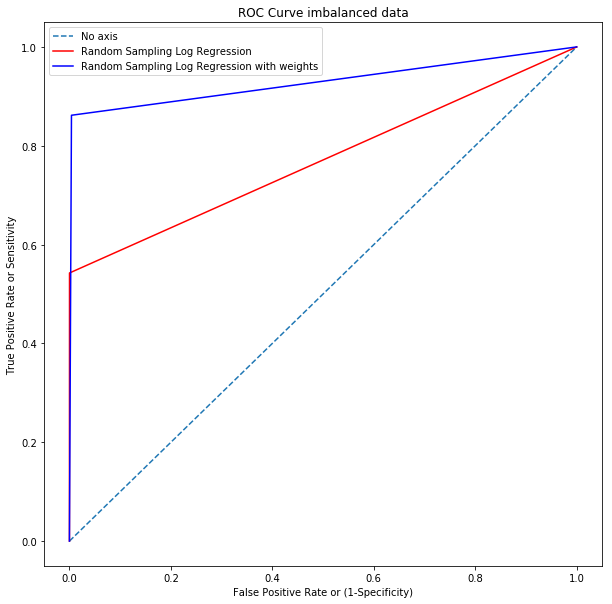

In [46]:
##ploting the ROC-curve curve and Precision recall curve
#fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,6))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle = "--",label="No axis")
plt.plot(fpr_logReg1,tpr_logReg1,label="Random Sampling Log Regression",color="red")
plt.plot(fpr_logReg2,tpr_logReg2,label="Random Sampling Log Regression with weights",color="blue")
plt.xlabel("False Positive Rate or (1-Specificity)")
plt.ylabel("True Positive Rate or Sensitivity")
plt.title("ROC Curve imbalanced data")
plt.legend()
plt.show()


## Precision-Recall Curve

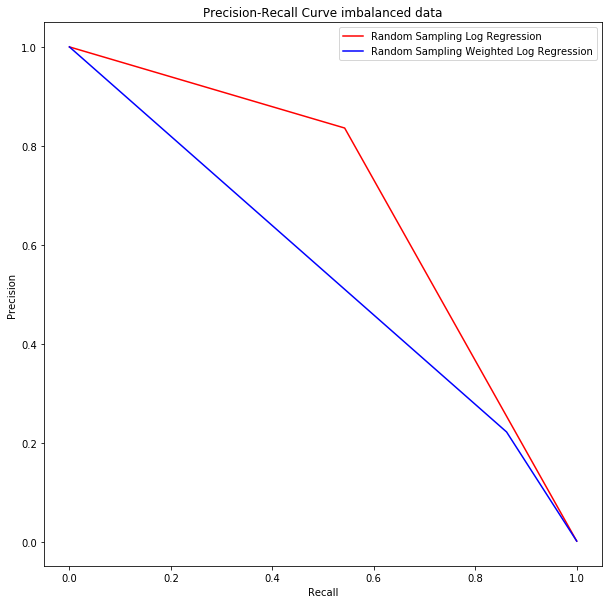

In [47]:
plt.figure(figsize=(10,10))
plt.plot(recall_LogReg1,prec_logReg1,label="Random Sampling Log Regression",color="red")
plt.plot(recall_LogReg2,prec_logReg2,label="Random Sampling Weighted Log Regression",color="blue")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve imbalanced data")
plt.legend()

## StraifiedSampling to create Train Test in proper ratio

In [48]:
stshuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0) #its the combination of StratifiedKfold and Shuffleshift

In [49]:
for train_index, test_index in stshuffle.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain_sss, original_Xtest_sss, original_ytrain_sss, original_ytest_sss = X.iloc[train_index], X.iloc[test_index],y.iloc[train_index], y.iloc[test_index]
print(original_Xtrain_sss.shape, original_Xtest_sss.shape, original_ytrain_sss.shape, original_ytest_sss.shape)

Train: [ 36001  12844   2873 ... 269968 175960  47973] Test: [159949  15295 260353 ... 211932  70523  97767]
Train: [ 46703  37864  53704 ... 195186 261438  51416] Test: [121014  92252 260341 ... 181799  82326 224004]
Train: [167230 199227 240655 ... 226803 125192  34695] Test: [ 77137 250389 162020 ...  29774 146893 221549]
Train: [  8038  60161 193863 ... 217105 207595   5194] Test: [ 70283 106113  44216 ...  27576 145659 248227]
Train: [ 73271  12342  27439 ...  85256 253556 274487] Test: [229938  58436 277040 ...  62592 245003 107389]
(227845, 30) (56962, 30) (227845,) (56962,)


In [50]:
print("In train data, %age of 0s is {a} and %age of 1s is {b}".format(a=original_ytrain_sss.value_counts()[0]/len(original_ytrain_sss)*100,b=original_ytrain_sss.value_counts()[1]/len(original_ytrain_sss)*100))
print("In test data, %age of 0s is {a} and %age of 1s is {b}".format(a=original_ytest_sss.value_counts()[0]/len(original_ytest_sss)*100,b=original_ytest_sss.value_counts()[1]/len(original_ytest_sss)*100))

In train data, %age of 0s is 99.82707542408215 and %age of 1s is 0.17292457591783889
In test data, %age of 0s is 99.82795547909133 and %age of 1s is 0.17204452090867595


Now that we have got our data in the propor ratio for test purpose, we want to use our test data thus created for the original testing of the model we will create. Now is the time for us to handle the imbalance data and fix the imbalance.There are various ways to achieve this: Datalevel approach and Algorrithm level(like applying boosting,ensemble or bagging etc).But lets try to apply logistic regression and see the result first.

## Undersampling

In [51]:
!pip install imbalanced-learn

In [52]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
original_Xtrain_nm, original_ytrain_nm = nm.fit_resample(original_Xtrain, original_ytrain)

In [53]:
original_ytrain_nm.value_counts()

1    394
0    394
Name: Class, dtype: int64

In [54]:
logReg3 = LogisticRegression(random_state=0)
logReg3.fit(original_Xtrain_nm,original_ytrain_nm)
y_pred_logReg3 = logReg3.predict(original_Xtest_sss)

In [55]:
training_score_cv_3 = round(np.mean(cross_val_score(logReg3,original_Xtrain_nm,original_ytrain_nm,cv=5)),3)
testing_score3 = round(accuracy_score(original_ytest_sss,y_pred_logReg3),3)
print("Training Score :{}".format(training_score_cv_3))
print("Testing Score :{}".format(testing_score3))

Training Score :0.939
Testing Score :0.704


In [56]:
#ROC and Precision-Recall Curve
fpr_logReg3,tpr_logReg3,thresholds_logReg3 = roc_curve(original_ytest_sss,y_pred_logReg3)
auc_logReg3 = round(roc_auc_score(original_ytest_sss,y_pred_logReg3),3)
prec_logReg3,recall_LogReg3,thresholds_pr_logReg3 = precision_recall_curve(original_ytest_sss,y_pred_logReg3)
auc_PR_logReg3 = round(auc(recall_LogReg3,prec_logReg3),3)
print(confusion_matrix(original_ytest_sss,y_pred_logReg3))
print(classification_report(original_ytest_sss,y_pred_logReg3))
print("Area under the curve:{}".format(auc_logReg3))
print("Area under the PR curve:{}".format(auc_PR_logReg3))

[[39988 16876]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.83     56864
           1       0.01      0.91      0.01        98

    accuracy                           0.70     56962
   macro avg       0.50      0.81      0.42     56962
weighted avg       1.00      0.70      0.82     56962

Area under the curve:0.806
Area under the PR curve:0.457


In [57]:
f1_score(original_ytest_sss,y_pred_logReg3)

0.010431928734689093

> - First of all with UnderSampling(using NearMiss), we have reduced the training data to just 784 while our testing data has total records = 56962.So with such low training data and so high testing data its a very bad practice to do so.
> - UnderSampling is not advised as it leads to data loss as well as so less data for training the model.
> - Observations: For 0s, we have correctly predicted 39988/56864 0s in total that accounts for 70% recall for 0s.We are ss bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 89/98 1s in total that accounts for 91% recall for 1s.So we have got  a good recall for 1s here and we are interested in this.It means that we have truly predicted most of the Frauds. GOOD FOR US!
> - While comparing Precision, we find for 0s, there are more True Positives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find lots of False Positive that says for 10% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s but the f1-score is really bad.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 70% and the ROC AUC = 80.6%.
> - Test Accuracy < Training Accuracy implies Overfitting Problem.

In [58]:
metrics_dict = {'Data':"Balanced",'Classifier':"Stratified Log Regression Undersample",
               'AUC':auc_logReg3,
               'Test Accuracy':testing_score3,
                'Train Accuracy':training_score_cv_3,
                'AUC_PR':auc_PR_logReg3}

In [59]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)

In [60]:
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542
2,Balanced,Stratified Log Regression Undersample,0.806,0.704,0.939,0.457


## OverSampling

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
original_Xtrain_os, original_ytrain_os = ros.fit_resample(original_Xtrain, original_ytrain)

In [63]:
original_ytrain_os.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [64]:
logReg4 = LogisticRegression(random_state=0) 
logReg4.fit(original_Xtrain_os,original_ytrain_os)
y_pred_logReg4 = logReg4.predict(original_Xtest_sss)

In [65]:
training_score_cv_4 = round(np.mean(cross_val_score(logReg4,original_Xtrain_os,original_ytrain_os,cv=5)),3)
testing_score4 = round(accuracy_score(original_ytest_sss,y_pred_logReg4),3)
print("Training Score :{}".format(training_score_cv_4))
print("Testing Score :{}".format(testing_score4))

Training Score :0.949
Testing Score :0.978


In [66]:
#ROC and Precision-Recall Curve
fpr_logReg4,tpr_logReg4,thresholds_logReg4 = roc_curve(original_ytest_sss,y_pred_logReg4)
auc_logReg4 = round(roc_auc_score(original_ytest_sss,y_pred_logReg4),3)
prec_logReg4,recall_LogReg4,thresholds_pr_logReg4 = precision_recall_curve(original_ytest_sss,y_pred_logReg4)
auc_PR_logReg4 = round(auc(recall_LogReg4,prec_logReg4),3)
print(confusion_matrix(original_ytest_sss,y_pred_logReg4))
print(classification_report(original_ytest_sss,y_pred_logReg4))
print("Area under the curve:{}".format(auc_logReg4))
print("Area under the PR curve:{}".format(auc_PR_logReg4))

[[55631  1233]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Area under the curve:0.948
Area under the PR curve:0.493


> - With OverSampling, we have increased the training data with 1s=227451, our testing data has total records = 56962.So this is better than undersampling.
> - OverSampling is not advised as it may lead to overfitting since it replicates the minority class events exactly.
> - Observations: For 0s, we have correctly predicted 55631/56864 0s in total that accounts for 98% recall for 0s.We are less bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 89/98 1s in total that accounts for 91% recall for 1s.So we have got  a good recall for 1s here and we are interested in this.It means that we have truly predicted most of the Frauds. GOOD FOR US!
> - While comparing Precision, we find for 0s, there are more True Positives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find reduction in number of False Positive that says for 6% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s the f1-score looks a little better here.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 98% and the ROC AUC = 94.8%.
> - Test Accuracy > Training Accuracy implies No Overfitting so we can consider this model for us.
> - The AUC for the oversamled model is better.

In [67]:
metrics_dict = {'Data':"Balanced",'Classifier':"Log Regression Oversample",
               'AUC':auc_logReg4,
               'Test Accuracy':testing_score4,
                'Train Accuracy':training_score_cv_4,
                'AUC_PR':auc_PR_logReg4}

In [68]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542
2,Balanced,Stratified Log Regression Undersample,0.806,0.704,0.939,0.457
3,Balanced,Log Regression Oversample,0.948,0.978,0.949,0.493


## SMOTE

In [69]:
from imblearn.over_sampling import SMOTE
original_Xtrain_smote, original_ytrain_smote = SMOTE().fit_resample(original_Xtrain, original_ytrain)

In [70]:
original_ytrain_smote.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [71]:
original_Xtrain_os.describe()

,Time_scaled,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,...,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000
mean,0.040884,1.173241,-2.392452,1.883158,-3.533852,2.252813,-1.643261,-0.666011,-2.777122,0.290548,...,0.342673,0.201569,0.305801,0.030160,-0.004744,-0.049568,0.020662,0.015969,0.083966,0.045945
std,0.560839,3.623775,5.579445,3.730241,6.274796,3.217409,4.203286,1.724349,5.975963,4.848112,...,1.257126,1.125723,2.734824,1.160379,1.131880,0.558094,0.669111,0.473824,1.021644,0.433898
min,-0.994983,-0.307413,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084
25%,-0.440372,-0.286173,-2.857144,-0.107795,-5.137274,-0.122375,-1.840375,-1.547941,-3.028013,-0.212325,...,-0.425014,-0.190050,-0.169404,-0.521934,-0.235697,-0.395579,-0.325033,-0.291440,-0.062361,-0.058706
50%,-0.043944,-0.041640,-0.817367,0.985633,-1.314007,1.286244,-0.468425,-0.638908,-0.663543,0.161064,...,0.234965,0.025427,0.149030,0.043807,-0.031549,0.005178,0.045418,-0.033680,0.052261,0.033599
75%,0.579025,1.089779,1.004996,2.795414,0.346379,4.228686,0.442581,0.084136,0.279202,0.861616,...,0.978636,0.427203,0.647714,0.585400,0.194823,0.368275,0.394096,0.319476,0.451243,0.219070
max,1.035022,358.683155,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808


In [72]:
original_Xtrain_smote.describe()

,Time_scaled,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,...,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000,454902.000000
mean,0.031256,1.092876,-2.329324,1.878819,-3.470516,2.215620,-1.640530,-0.689861,-2.721783,0.401822,...,0.350556,0.204605,0.321528,0.017664,0.007582,-0.048949,0.037198,0.016199,0.096438,0.052665
std,0.539819,3.408942,5.497939,3.625642,6.215178,3.157397,4.141257,1.640028,5.801105,4.437174,...,1.219308,1.019506,2.460678,1.064113,0.866582,0.532876,0.600335,0.443235,0.972835,0.407506
min,-0.994983,-0.307413,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084
25%,-0.418790,-0.275026,-2.729173,-0.093348,-5.029962,-0.090756,-1.787711,-1.496698,-2.915964,-0.187562,...,-0.387417,-0.178948,-0.156815,-0.494410,-0.213411,-0.375798,-0.293354,-0.272478,-0.057699,-0.050749
50%,-0.069749,-0.015145,-0.781104,1.011052,-1.336049,1.311950,-0.481678,-0.673591,-0.655748,0.168640,...,0.253347,0.044728,0.159486,0.036528,-0.032209,-0.000231,0.046344,-0.029419,0.054171,0.036443
75%,0.541501,1.089779,0.973735,2.790568,0.346746,4.096932,0.425737,0.029810,0.289200,0.878605,...,0.992546,0.409255,0.666133,0.531030,0.178417,0.338824,0.381940,0.293429,0.453299,0.218965
max,1.035022,358.683155,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808


Here we did the describe for both the Xtrain dataset thus created with RandomOversampling(minority data is just duplicated). And for SMOTE oversampler (minority data is oversamples using K nearest data points).We also find the diff in mean of the columns after doing the samplings.

In [73]:
logReg5 = LogisticRegression(random_state=0)
logReg5.fit(original_Xtrain_smote,original_ytrain_smote)
y_pred_logReg5 = logReg5.predict(original_Xtest_sss)

In [74]:
training_score_cv_5 = round(np.mean(cross_val_score(logReg5,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score5 = round(accuracy_score(original_ytest_sss,y_pred_logReg5),3)
print("Training Score :{}".format(training_score_cv_5))
print("Testing Score :{}".format(testing_score5))

Training Score :0.949
Testing Score :0.977


In [75]:
#ROC and Precision-Recall Curve
fpr_logReg5,tpr_logReg5,thresholds_logReg5 = roc_curve(original_ytest_sss,y_pred_logReg5)
auc_logReg5 = round(roc_auc_score(original_ytest_sss,y_pred_logReg5),3)
prec_logReg5,recall_LogReg5,thresholds_pr_logReg5 = precision_recall_curve(original_ytest_sss,y_pred_logReg5)
auc_PR_logReg5 = round(auc(recall_LogReg5,prec_logReg5),3)
print(confusion_matrix(original_ytest_sss,y_pred_logReg5))
print(classification_report(original_ytest_sss,y_pred_logReg5))
print("Area under the curve:{}".format(auc_logReg5))
print("Area under the PR curve:{}".format(auc_PR_logReg5))

[[55535  1329]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Area under the curve:0.942
Area under the PR curve:0.486


> - With SMOTE, we have increased the training data with 1s=227451, our testing data has total records = 56962.So this is better than any random sampling.
> - SMOTE is advised as it doesnot cause any overfitting since it creates the minority class events using k-nearest method.
> - Observations: For 0s, we have correctly predicted 55522/56864 0s in total that accounts for 98% recall for 0s.We are less bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 89/98 1s in total that accounts for 91% recall for 1s.So we have got  a good recall for 1s here and we are interested in this.It means that we have truly predicted most of the Frauds. GOOD FOR US!
> - While comparing Precision, we find for 0s, there are more True Positives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find reduction in number of False Positive that says for 6% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s the f1-score looks a little better here.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 98% and the ROC AUC = 94.2%.
> - Test Accuracy > Training Accuracy implies No Overfitting so we can consider this model for us.
> - The AUC for the SMOTE model = AUC for Oversampled data.

In [76]:
metrics_dict = {'Data':"Balanced",'Classifier':"Log Regression SMOTE",
               'AUC':auc_logReg5,
               'Test Accuracy':testing_score5,
                'Train Accuracy':training_score_cv_5,
                'AUC_PR':auc_PR_logReg5}

In [77]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542
2,Balanced,Stratified Log Regression Undersample,0.806,0.704,0.939,0.457
3,Balanced,Log Regression Oversample,0.948,0.978,0.949,0.493
4,Balanced,Log Regression SMOTE,0.942,0.977,0.949,0.486


## Naive Bayes with SMOTE Data

In [78]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(original_Xtrain_smote,original_ytrain_smote)
y_pred_nb = nb_model.predict(original_Xtest_sss)

In [79]:
training_score_cv_6 = round(np.mean(cross_val_score(nb_model,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score6 = round(accuracy_score(original_ytest_sss,y_pred_nb),3)
print("Training Score :{}".format(training_score_cv_6))
print("Testing Score :{}".format(testing_score6))

Training Score :0.918
Testing Score :0.975


In [80]:
#ROC and Precision-Recall Curve
fpr_nb,tpr_nb,thresholds_nb = roc_curve(original_ytest_sss,y_pred_nb)
auc_nb = round(roc_auc_score(original_ytest_sss,y_pred_nb),3)
prec_nb,recall_nb,thresholds_pr_nb = precision_recall_curve(original_ytest_sss,y_pred_nb)
auc_PR_nb = round(auc(recall_nb,prec_nb),3)
print(confusion_matrix(original_ytest_sss,y_pred_nb))
print(classification_report(original_ytest_sss,y_pred_nb))
print("Area under the curve:{}".format(auc_nb))
print("Area under the PR curve:{}".format(auc_PR_nb))

[[55452  1412]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.05      0.84      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Area under the curve:0.906
Area under the PR curve:0.446


> - Observations: For 0s, we have correctly predicted 55448/56864 0s in total that accounts for 98% recall for 0s.We are less bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 82/98 1s in total that accounts for 84% recall for 1s.So we have got a lesser recall here for 1s here and we are interested in this.It means that we have predicted the Frauds but still lesser than earlier aaplied model.
> - While comparing Precision, we find for 0s, there are more True Positives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find reduction in number of False Positive that says for 5% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s the f1-score looks a little better here.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 97% and the ROC AUC = 90.6%.
> - Test Accuracy > Training Accuracy implies No Overfitting so we can consider this model for us.
> - The AUC for the NB model has reduced.

In [81]:
metrics_dict = {'Data':"Balanced",'Classifier':"Naive Bayes SMOTE",
               'AUC':auc_nb,
               'Test Accuracy':testing_score6,
                'Train Accuracy':training_score_cv_6,
                'AUC_PR':auc_PR_nb}

In [82]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542
2,Balanced,Stratified Log Regression Undersample,0.806,0.704,0.939,0.457
3,Balanced,Log Regression Oversample,0.948,0.978,0.949,0.493
4,Balanced,Log Regression SMOTE,0.942,0.977,0.949,0.486
5,Balanced,Naive Bayes SMOTE,0.906,0.975,0.918,0.446


## KNN With SMOTE data

In [83]:
#from sklearn.neighbors import KNeighborsClassifier
# accuracy_Knn = []
# for k in range(1,40):
#     print("For K value : " + str(k))
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(original_Xtrain_smote,original_ytrain_smote)
#     y_pred_knn = knn_model.predict(original_Xtest_sss)
#     #training_score_cv = round(np.mean(cross_val_score(nb_model,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
#     testing_score = round(accuracy_score(original_ytest_sss,y_pred_knn),3)
#     accuracy_Knn.append(testing_score)
#     #print("Training Score :{}".format(training_score_cv))
#     #print("Testing Score :{}".format(testing_score))

In [84]:
accuracy_Knn = [0.999,
 0.999,
 0.999,
 0.999,
 0.998,
 0.998,
 0.998,
 0.998,
 0.997,
 0.997,
 0.996,
 0.997,
 0.996,
 0.996,
 0.995,
 0.995,
 0.995,
 0.995,
 0.994,
 0.994,
 0.994,
 0.994,
 0.993,
 0.993,
 0.993,
 0.993,
 0.992,
 0.992,
 0.992,
 0.992,
 0.992,
 0.992,
 0.991,
 0.991,
 0.991,
 0.991,
 0.99,
 0.991,
 0.99]
accuracy_Knn

[0.999,
 0.999,
 0.999,
 0.999,
 0.998,
 0.998,
 0.998,
 0.998,
 0.997,
 0.997,
 0.996,
 0.997,
 0.996,
 0.996,
 0.995,
 0.995,
 0.995,
 0.995,
 0.994,
 0.994,
 0.994,
 0.994,
 0.993,
 0.993,
 0.993,
 0.993,
 0.992,
 0.992,
 0.992,
 0.992,
 0.992,
 0.992,
 0.991,
 0.991,
 0.991,
 0.991,
 0.99,
 0.991,
 0.99]

Text(0, 0.5, 'Accuracy Score')

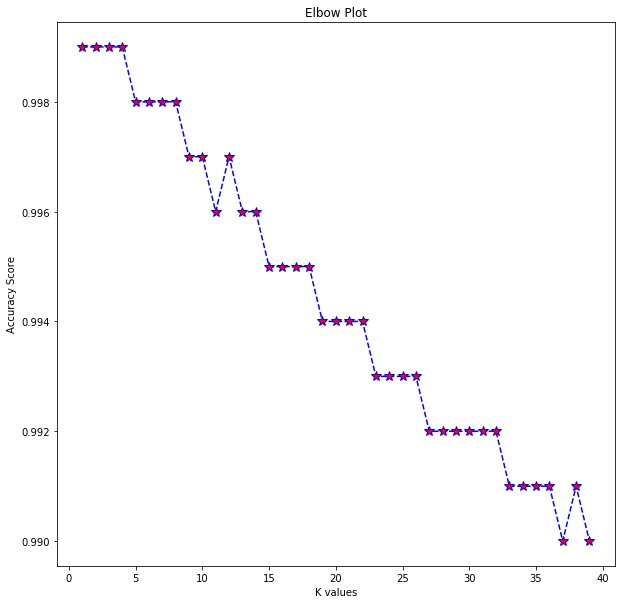

In [85]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40),accuracy_Knn,color='blue',marker='*',markerfacecolor='red',linestyle='dashed',markersize=10)
plt.title("Elbow Plot")
plt.xlabel("K values")
plt.ylabel("Accuracy Score")

After k=4, the accuracy starts to decrease so we should take that value as our optimum k and reapply the KNN model to do the prediction.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(original_Xtrain_smote,original_ytrain_smote)
y_pred_knn = knn_model.predict(original_Xtest_sss)
training_score_cv_7 = round(np.mean(cross_val_score(knn_model,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score7 = round(accuracy_score(original_ytest_sss,y_pred_knn),3)
accuracy_Knn.append(testing_score7)
print("Training Score :{}".format(training_score_cv_7))
print("Testing Score :{}".format(testing_score7))

Training Score :0.999
Testing Score :0.999


In [87]:
#ROC and Precision-Recall Curve
fpr_knn,tpr_knn,thresholds_knn = roc_curve(original_ytest_sss,y_pred_knn)
auc_knn = round(roc_auc_score(original_ytest_sss,y_pred_knn),3)
prec_knn,recall_knn,thresholds_pr_knn = precision_recall_curve(original_ytest_sss,y_pred_knn)
auc_PR_knn = round(auc(recall_knn,prec_knn),3)
print(confusion_matrix(original_ytest_sss,y_pred_knn))
print(classification_report(original_ytest_sss,y_pred_knn))
print("Area under the curve:{}".format(auc_knn))
print("Area under the PR curve:{}".format(auc_PR_knn))

[[56798    66]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.82      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.91      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Area under the curve:0.908
Area under the PR curve:0.682


> - Decision tree learners create biased trees if some classes dominate. So we are using balanced data out of SMOTE.
> - Observations: For 0s, we have correctly predicted 56797/56864 0s in total that accounts for 100% recall for 0s.We are less bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 80/98 1s in total that accounts for 82% recall for 1s.So we have got a lesser recall here for 1s here and we are interested in this.It means that we have predicted the Frauds but still lesser than earlier aaplied model.
> - While comparing Precision, we find for 0s, there are more True Negatives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find reduction in number of False Positive that says for 54% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s the f1-score looks a little better here.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 100% and the ROC AUC = 90.8%. So high accuracy ishard t o believe.
> - Test Accuracy = Training Accuracy implies No Overfitting but overfitting is also somewhere possible.
> - The AUC for the KNN model has reduced.

In [88]:
metrics_dict = {'Data':"Balanced",'Classifier':"KNN SMOTE",
               'AUC':auc_knn,
               'Test Accuracy':testing_score7,
                'Train Accuracy':training_score_cv_7,
                'AUC_PR':auc_PR_knn}

In [89]:
my_metrics = my_metrics.append(metrics_dict,ignore_index=True)
my_metrics

,Data,Classifier,AUC,Test Accuracy,Train Accuracy,AUC_PR
0,Imbalanced,Random Sampling Log Regression,0.771,0.999,0.999,0.690
1,Imbalanced,Random Sampling Log Regression+ Weights,0.929,0.996,0.977,0.542
2,Balanced,Stratified Log Regression Undersample,0.806,0.704,0.939,0.457
3,Balanced,Log Regression Oversample,0.948,0.978,0.949,0.493
4,Balanced,Log Regression SMOTE,0.942,0.977,0.949,0.486
5,Balanced,Naive Bayes SMOTE,0.906,0.975,0.918,0.446
6,Balanced,KNN SMOTE,0.908,0.999,0.999,0.682


## Decision Tree with SMOTE DATA

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
dtree_clf = DecisionTreeClassifier()

In [91]:
params = {'criterion':['gini','entropy'],
          'max_depth': randint(1, 25), 
          'min_samples_split':randint(1, 20), 
          'min_samples_leaf':randint(1, 20),
          'max_features':randint(1, 30), 
          'max_leaf_nodes':randint(1, 20)}

In [92]:
rscv_dtree = RandomizedSearchCV(estimator=dtree_clf,param_distributions=params,random_state=0)

In [93]:
rscv_dtree.fit(original_Xtrain_smote,original_ytrain_smote)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204AAE05AC8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204A0999C88>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204A098B0B8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204AADD7CF8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204AAE05278>},
                   random_state=0)

In [94]:
rscv_dtree.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=21, max_leaf_nodes=17,
                       min_samples_leaf=6, min_samples_split=16)

In [95]:
rscv_dtree.best_params_
# #{'criterion': 'gini',
#  'max_depth': 10,
#  'max_features': 21,
#  'max_leaf_nodes': 17,
#  'min_samples_leaf': 6,
#  'min_samples_split': 16}

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 21,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 6,
 'min_samples_split': 16}

As a practice, we do RandomizedSearchCV as its fast processing and gives us the best parameters with random selections from the given param_distribution.
Have commented the below as they are very time consuming for me and will stick to the RandomizedSearchCV.best_params_

In [96]:
# from sklearn.model_selection import GridSearchCV

In [97]:
# params_gscv = {'criterion': ['gini','entropy'],
#           'max_depth': [8,9,10,11,12,13], 
#           'min_samples_split': (12,20,2), 
#           'min_samples_leaf':(4,8,1),
#           'max_features':[20,21,22], 
#           'max_leaf_nodes':[13,21,2]}

In [98]:
# gscv_dtree = GridSearchCV(estimator=dtree_clf,param_grid=params_gscv)
# gscv_dtree.fit(original_Xtrain_smote,original_ytrain_smote)
# gscv_dtree.best_estimator_

In [99]:
y_pred_dtree = rscv_dtree.best_estimator_.predict(original_Xtest_sss)

In [100]:
training_score_cv_8 = round(np.mean(cross_val_score(rscv_dtree.best_estimator_,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score8 = round(accuracy_score(original_ytest_sss,y_pred_dtree),3)
print("Training Score :{}".format(training_score_cv_8)) 
print("Testing Score :{}".format(testing_score8))

Training Score :0.958
Testing Score :0.974


In [101]:
#ROC and Precision-Recall Curve
fpr_dtree,tpr_dtree,thresholds_dtree = roc_curve(original_ytest_sss,y_pred_dtree)
auc_dtree = round(roc_auc_score(original_ytest_sss,y_pred_dtree),3)
prec_dtree,recall_dtree,thresholds_pr_dtree = precision_recall_curve(original_ytest_sss,y_pred_dtree)
auc_PR_dtree = round(auc(recall_dtree,prec_dtree),3)
print(confusion_matrix(original_ytest_sss,y_pred_dtree))
print(classification_report(original_ytest_sss,y_pred_dtree))
print("Area under the curve:{}".format(auc_dtree))
print("Area under the PR curve:{}".format(auc_PR_dtree))

[[55415  1449]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Area under the curve:0.931
Area under the PR curve:0.472


> - Observations: For 0s, we have correctly predicted 54948/56864 0s in total that accounts for 97% recall for 0s.We are less bothered about 0s in our case as our objective is to detect Frauds.
> - For 1s, we have correctly predicted 88/98 1s in total that accounts for 90% recall for 1s.So we have got a lesser recall here for 1s here and we are interested in this.It means that we have predicted the Frauds but still lesser than earlier aaplied model.
> - While comparing Precision, we find for 0s, there are more True Negatives so prediction for 0s looks good but we are not really interested in the No-Frauds.
> - For 1s, we find increase in number of False Positive that says for 100% percision in 1s.We have marked so many No-Frauds as Frauds.
> - In our case we are more interested in Recall for 1s the f1-score looks a little better here.
> - Considering it a balanced dataset, we should take into consideration metrics like f1-score,accuracy,Auc,ROC AUC instead of PRCurves, PR AUC anymore.
> - f1-score is maximum when Precision is equal to Recall but we want our data to have more recall so we can either consider f1-beta or rather compare accuracy.
> - The Accuracy for this balanced data model is 93.2% and the ROC AUC = 47.1%. Accuracy has reduced for this model.
> - Test Accuracy > Training Accuracy implies  Overfitting and we know Decision Tree is a Overfitting model.
> - The AUC for the Decision Tree is reduced.

## RandomForest with SMOTE data

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini')

In [103]:
# param_rf = {'n_estimators':randint(50,800),
#             'max_depth': randint(1, 25), 
#             'min_samples_split':randint(1, 20), 
#             'min_samples_leaf':randint(1, 20),
#             'max_features':randint(1, 30), 
#             'max_leaf_nodes':randint(1, 20)}
param_rf = {'n_estimators':[100]}

In [104]:
rscv_rf = RandomizedSearchCV(estimator=rf_model,param_distributions=param_rf,random_state=0)

In [105]:
rscv_rf.fit(original_Xtrain_smote,original_ytrain_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': [100]}, random_state=0)

In [106]:
rscv_rf.best_params_

{'n_estimators': 100}

In [107]:
rscv_rf.best_estimator_

RandomForestClassifier()

In [108]:
y_pred_rf = rscv_rf.best_estimator_.predict(original_Xtest_sss)

In [109]:
training_score_cv_9 = round(np.mean(cross_val_score(rscv_rf.best_estimator_,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score9 = round(accuracy_score(original_ytest_sss,y_pred_rf),3)
print("Training Score :{}".format(training_score_cv_9)) 
print("Testing Score :{}".format(testing_score9))

Training Score :1.0
Testing Score :1.0


In [110]:
#ROC and Precision-Recall Curve
fpr_rf,tpr_rf,thresholds_rf = roc_curve(original_ytest_sss,y_pred_rf)
auc_rf = round(roc_auc_score(original_ytest_sss,y_pred_rf),3)
prec_rf,recall_rf,thresholds_pr_rf = precision_recall_curve(original_ytest_sss,y_pred_rf)
auc_PR_rf = round(auc(recall_rf,prec_rf),3)
print(confusion_matrix(original_ytest_sss,y_pred_rf))
print(classification_report(original_ytest_sss,y_pred_rf))
print("Area under the curve:{}".format(auc_rf))
print("Area under the PR curve:{}".format(auc_PR_rf  ))

[[56858     6]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Area under the curve:0.893
Area under the PR curve:0.857


For imbalanced classes in target, the predictions may not be trusted always.If one class is rare then the bagging very less trees might have the data about them.In case of imbalanced classes this may not be the best algorithm so we are using the SMOTE balanced data here.

## Adaboost

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(random_state=0)
param_ada = {'n_estimators':[50,100,150,200,250],'learning_rate':np.arange(0,2,0.2)}

In [112]:
from sklearn.model_selection import GridSearchCV
grid_ada = GridSearchCV(estimator=ada_boost,param_grid = param_ada)

In [113]:
grid_ada.fit(original_Xtrain_smote,original_ytrain_smote)

KeyboardInterrupt: 

In [ ]:
grid_ada.best_params_

In [ ]:
grid_ada.best_estimator_

In [ ]:
y_pred_ada = grid_ada.best_estimator_.predict(original_Xtest_sss)

In [ ]:
training_score_cv_10 = round(np.mean(cross_val_score(grid_ada.best_estimator_,original_Xtrain_smote,original_ytrain_smote,cv=5)),3)
testing_score10 = round(accuracy_score(original_ytest_sss,y_pred_ada),3)
print("Training Score :{}".format(training_score_cv_10)) 
print("Testing Score :{}".format(testing_score10))

In [ ]:
#ROC and Precision-Recall Curve
fpr_ada,tpr_ada,thresholds_ada = roc_curve(original_ytest_sss,y_pred_ada)
auc_ada = round(roc_auc_score(original_ytest_sss,y_pred_ada),3)
prec_ada,recall_ada,thresholds_pr_ada = precision_recall_curve(original_ytest_sss,y_pred_ada)
auc_PR_ada = round(auc(recall_ada,prec_ada),3)
print(confusion_matrix(original_ytest_sss,y_pred_ada))
print(classification_report(original_ytest_sss,y_pred_ada))
print("Area under the curve:{}".format(auc_ada))
print("Area under the PR curve:{}".format(auc_PR_ada))

## ROC Curve

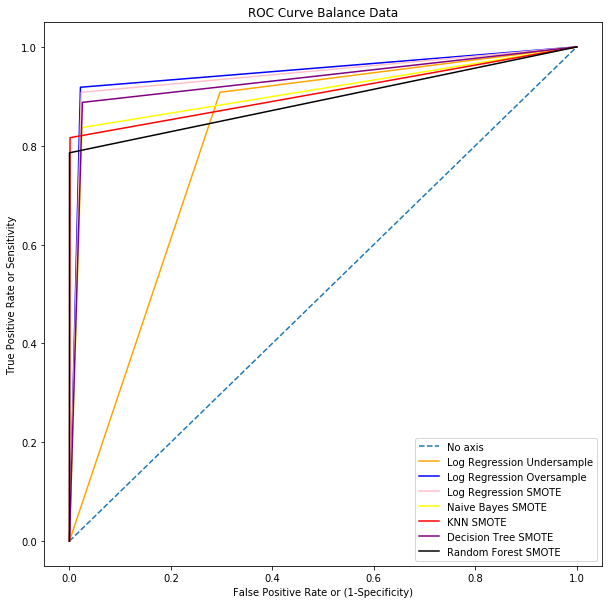

In [115]:
##ploting the ROC-curve curve and Precision recall curve
#fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(8,6))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle = "--",label="No axis")
plt.plot(fpr_logReg3,tpr_logReg3,label="Log Regression Undersample",color="orange")
plt.plot(fpr_logReg4,tpr_logReg4,label="Log Regression Oversample",color="blue")
plt.plot(fpr_logReg5,tpr_logReg5,label="Log Regression SMOTE",color="pink")
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes SMOTE",color="yellow")
plt.plot(fpr_knn,tpr_knn,label="KNN SMOTE",color="red")
plt.plot(fpr_dtree,tpr_dtree,label="Decision Tree SMOTE",color="purple")
plt.plot(fpr_rf,tpr_rf,label="Random Forest SMOTE",color="black")
#plt.plot(fpr_ada,tpr_ada,label="Adaboost SMOTE",color="violet")
plt.xlabel("False Positive Rate or (1-Specificity)")
plt.ylabel("True Positive Rate or Sensitivity")
plt.title("ROC Curve Balance Data")
plt.legend()
plt.show()


> - The ROC_AUC curve is generally not considered while dealing with Balanced data.
> - Log Regression Oversample is slightly overlapping with Log Regression SMOTE

## Precision Recall Curve

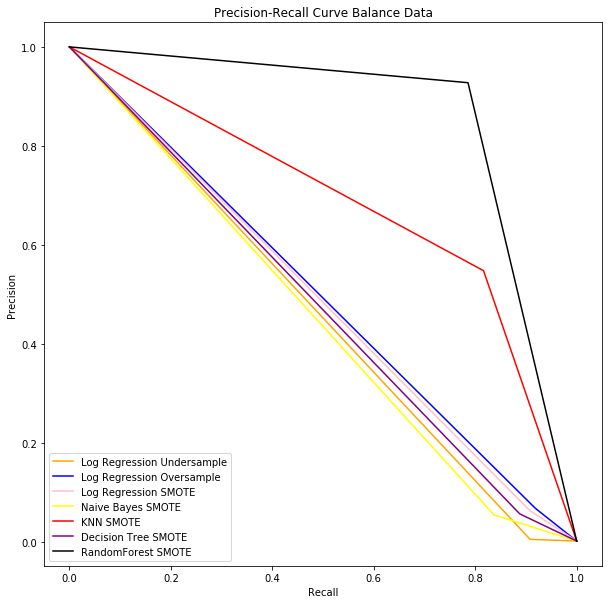

In [116]:
plt.figure(figsize=(10,10))
plt.plot(recall_LogReg3,prec_logReg3,label="Log Regression Undersample",color="orange")
plt.plot(recall_LogReg4,prec_logReg4,label="Log Regression Oversample",color="blue")
plt.plot(recall_LogReg5,prec_logReg5,label="Log Regression SMOTE",color="pink")
plt.plot(recall_nb,prec_nb,label="Naive Bayes SMOTE",color="yellow")
plt.plot(recall_knn,prec_knn,label="KNN SMOTE",color="red")
plt.plot(recall_dtree,prec_dtree,label="Decision Tree SMOTE",color="purple")
plt.plot(recall_rf,prec_rf,label="RandomForest SMOTE",color="black")
#plt.plot(recall_ada,prec_ada,label="Adaboost SMOTE",color="violet")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve Balance Data")
plt.legend()

> - The PR curve is generally considered while dealing with imbalanced data but we are doing it here just for our reference.